In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd 
import time
import numpy as np
from tqdm.notebook import tqdm
import random

from script.genetic_algorithm import optimize_normalized_genetic_algorithm_markowitz

In [3]:
data_path = Path('.').resolve().parent.joinpath("data", "base_dados.xlsx")
data = pd.read_excel(data_path)
data.index = pd.to_datetime(data.index)
data = data.set_index("Date").sort_index().pct_change().dropna()

# 2 Ativos

In [42]:
cols = random.sample(list(data.columns), 2)
data_returns = data[cols]

In [43]:
num_assets = len(data_returns.columns)
expected_returns = data_returns.mean()
covariance_matrix = data_returns.cov()

population_size = 15
max_iterations = 10000
mutation_rate = 0.5
fitness_threshold = 1e-7


returns_percentile = 0
volatility_tolerance = 100

results = dict()

inicio = time.time()
for risk_aversion in range(0, 101, 5):
    risk_aversion = risk_aversion/100
    bi_series, returns, risk = optimize_normalized_genetic_algorithm_markowitz(population_size, num_assets, expected_returns, covariance_matrix, risk_aversion, max_iterations, mutation_rate, fitness_threshold, returns_percentile, volatility_tolerance)
#     results.append( [bi_series, returns, risk] )
    results[str(risk_aversion)] = {
        'bi_series': bi_series,
        'r': returns,
        's': risk
    }
fim = time.time()

print(f"{fim - inicio} segundos")

319.3771026134491 segundos


In [44]:
def initial_tuples(n, p_max, step, result=()):
    if n == 0:
        yield result
    else:
        for i in range(0, p_max + 1, step):
            yield from initial_tuples(n-1, p_max-i, step, result + (i,))
            
def generate_all_asset_combinations(n_ativos, step):
    result = list(initial_tuples(n_ativos - 1, 100, step))
    final_result = []
    for row in result:
        new_row = row + (100 - sum(row), )
        final_result.append(new_row)
    return final_result



In [45]:
inicio = time.time()
li = generate_all_asset_combinations(n_ativos=2, step=1)

# MAXIMO E MINIMO PARA NORMALIZACAO
max_r = [-np.inf, None]
min_s = [None, +np.inf]
    
for item in li:
    r = np.dot(data_returns, item).mean()
    s = np.dot(data_returns, item).std()
    max_r[0] = max_r[0] if r < max_r[0] else r
    max_r[1] = max_r[1] if r < max_r[0] else s
    
    min_s[1] = min_s[1] if s > min_s[1] else s
    min_s[0] = min_s[0] if s > min_s[1] else r
    

dic = dict()
for ra in range(0, 101, 5):
    ra = ra/100
    
    bf = +np.inf

    for item in li:
        item = np.array(item)/100
        r = np.dot(data_returns, item).mean()
        s = np.sqrt(np.linalg.multi_dot([item, data_returns.cov(), item]))
        
        # NORMALIZACAO
        rn = (r - min_s[0])/(max_r[0] - min_s[0])
        sn = (s - min_s[1])/(max_r[1] - min_s[1])
        f = ra * sn - (1-ra)*rn
        if f < bf:
            bf = f
            dic[ra] = {
                'r': r,
                's': s,
                'f': f
            }
            
fim = time.time()

print(f"{fim - inicio} segundos")

0.4765923023223877 segundos


C:\Users\Hideki\AppData\Local\Temp\ipykernel_14660\2153307807.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


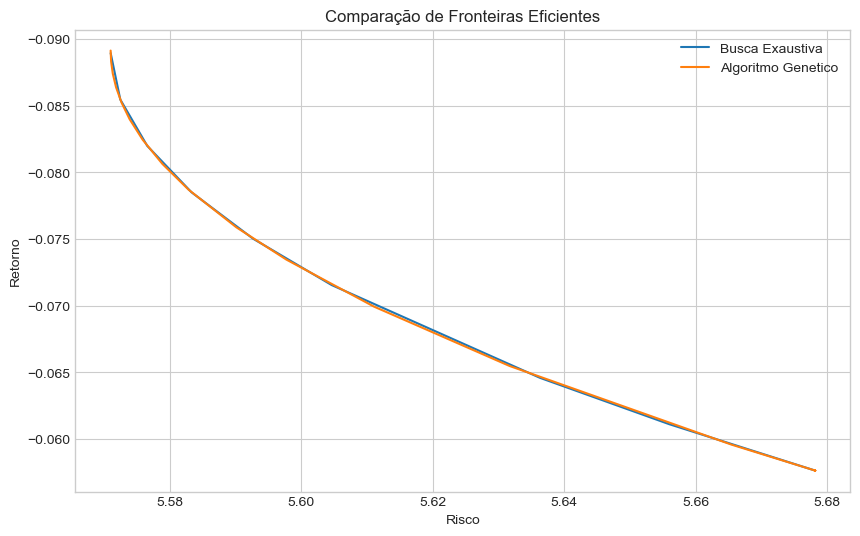

In [46]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')
colors = ['b', 'g']

plt.plot(100*pd.DataFrame(dic).T['s'], 100*pd.DataFrame(dic).T['r'], label='Busca Exaustiva')
plt.plot(100*pd.DataFrame(results).T['s'], 100*pd.DataFrame(results).T['r'], label='Algoritmo Genetico')

plt.title('Comparação de Fronteiras Eficientes')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.legend()
plt.gca().invert_yaxis()

plt.savefig("2ativos_geneticoxbusca.jpg", dpi=300)

# 5 Ativos

In [8]:
cols = random.sample(list(data.columns), 5)
data_returns = data[cols]

In [9]:
num_assets = len(data_returns.columns)
expected_returns = data_returns.mean()
covariance_matrix = data_returns.cov()

population_size = 15
max_iterations = 10000
mutation_rate = 0.5
fitness_threshold = 1e-7


returns_percentile = 0
volatility_tolerance = 100

results = dict()

inicio = time.time()
for risk_aversion in range(0, 101, 5):
    risk_aversion = risk_aversion/100
    bi_series, returns, risk = optimize_normalized_genetic_algorithm_markowitz(population_size, num_assets, expected_returns, covariance_matrix, risk_aversion, max_iterations, mutation_rate, fitness_threshold, returns_percentile, volatility_tolerance)
#     results.append( [bi_series, returns, risk] )
    results[str(risk_aversion)] = {
        'bi_series': bi_series,
        'r': returns,
        's': risk
    }
fim = time.time()

print(f"{fim - inicio} segundos")

38.95236349105835 segundos


In [10]:
def initial_tuples(n, p_max, step, result=()):
    if n == 0:
        yield result
    else:
        for i in range(0, p_max + 1, step):
            yield from initial_tuples(n-1, p_max-i, step, result + (i,))
            
def generate_all_asset_combinations(n_ativos, step):
    result = list(initial_tuples(n_ativos - 1, 100, step))
    final_result = []
    for row in result:
        new_row = row + (100 - sum(row), )
        final_result.append(new_row)
    return final_result

In [11]:
inicio = time.time()
li = generate_all_asset_combinations(n_ativos=5, step=1)

# MAXIMO E MINIMO PARA NORMALIZACAO
max_r = [-np.inf, None]
min_s = [None, +np.inf]
    
for item in li:
    r = np.dot(data_returns, item).mean()
    s = np.dot(data_returns, item).std()
    max_r[0] = max_r[0] if r < max_r[0] else r
    max_r[1] = max_r[1] if r < max_r[0] else s
    
    min_s[1] = min_s[1] if s > min_s[1] else s
    min_s[0] = min_s[0] if s > min_s[1] else r
    

dic = dict()
for ra in range(0, 101, 5):
    ra = ra/100
    
    bf = +np.inf

    for item in li:
        item = np.array(item)/100
        r = np.dot(data_returns, item).mean()
        s = np.sqrt(np.linalg.multi_dot([item, data_returns.cov(), item]))
        
        # NORMALIZACAO
        rn = (r - min_s[0])/(max_r[0] - min_s[0])
        sn = (s - min_s[1])/(max_r[1] - min_s[1])
        f = ra * sn - (1-ra)*rn
        if f < bf:
            bf = f
            dic[ra] = {
                'r': r,
                's': s,
                'f': f
            }
            
fim = time.time()

print(f"{fim - inicio} segundos")

20970.87733721733 segundos


C:\Users\Hideki\AppData\Local\Temp\ipykernel_14660\2153307807.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


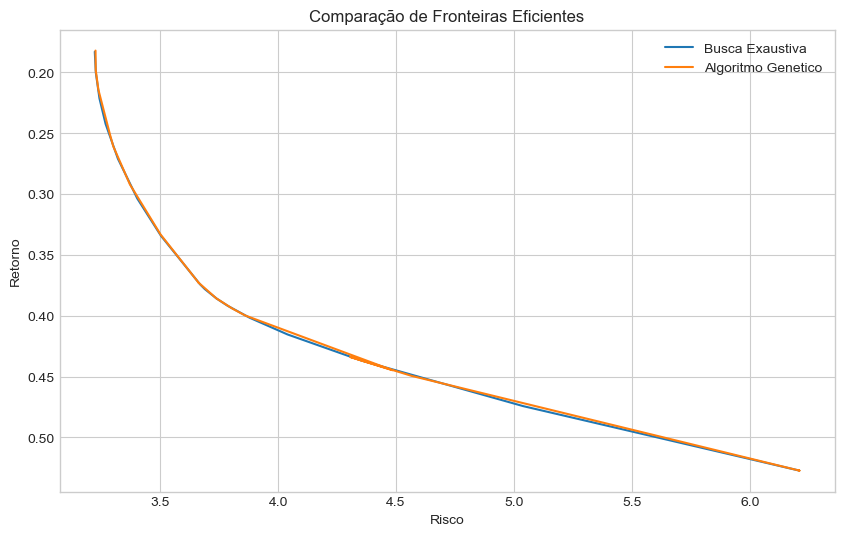

In [12]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')
colors = ['b', 'g']

plt.plot(100*pd.DataFrame(dic).T['s'], 100*pd.DataFrame(dic).T['r'], label='Busca Exaustiva')
plt.plot(100*pd.DataFrame(results).T['s'], 100*pd.DataFrame(results).T['r'], label='Algoritmo Genetico')

plt.title('Comparação de Fronteiras Eficientes')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.legend()
plt.gca().invert_yaxis()

plt.savefig("5ativos.jpg", dpi=300)

# 3 Ativos

In [23]:
cols = random.sample(list(data.columns), 3)
data_returns = data[cols]

In [24]:
num_assets = len(data_returns.columns)
expected_returns = data_returns.mean()
covariance_matrix = data_returns.cov()

population_size = 15
max_iterations = 10000
mutation_rate = 0.5
fitness_threshold = 1e-7


returns_percentile = 0
volatility_tolerance = 100

results = dict()

inicio = time.time()
for risk_aversion in range(0, 101, 5):
    risk_aversion = risk_aversion/100
    bi_series, returns, risk = optimize_normalized_genetic_algorithm_markowitz(population_size, num_assets, expected_returns, covariance_matrix, risk_aversion, max_iterations, mutation_rate, fitness_threshold, returns_percentile, volatility_tolerance)
#     results.append( [bi_series, returns, risk] )
    results[str(risk_aversion)] = {
        'bi_series': bi_series,
        'r': returns,
        's': risk
    }
fim = time.time()

print(f"{fim - inicio} segundos")

25.066420555114746 segundos


In [25]:
def initial_tuples(n, p_max, step, result=()):
    if n == 0:
        yield result
    else:
        for i in range(0, p_max + 1, step):
            yield from initial_tuples(n-1, p_max-i, step, result + (i,))
            
def generate_all_asset_combinations(n_ativos, step):
    result = list(initial_tuples(n_ativos - 1, 100, step))
    final_result = []
    for row in result:
        new_row = row + (100 - sum(row), )
        final_result.append(new_row)
    return final_result



In [26]:
inicio = time.time()
li = generate_all_asset_combinations(n_ativos=3, step=1)

# MAXIMO E MINIMO PARA NORMALIZACAO
max_r = [-np.inf, None]
min_s = [None, +np.inf]
    
for item in li:
    r = np.dot(data_returns, item).mean()
    s = np.dot(data_returns, item).std()
    max_r[0] = max_r[0] if r < max_r[0] else r
    max_r[1] = max_r[1] if r < max_r[0] else s
    
    min_s[1] = min_s[1] if s > min_s[1] else s
    min_s[0] = min_s[0] if s > min_s[1] else r
    

dic = dict()
for ra in range(0, 101, 5):
    ra = ra/100
    
    bf = +np.inf

    for item in li:
        item = np.array(item)/100
        r = np.dot(data_returns, item).mean()
        s = np.sqrt(np.linalg.multi_dot([item, data_returns.cov(), item]))
        
        # NORMALIZACAO
        rn = (r - min_s[0])/(max_r[0] - min_s[0])
        sn = (s - min_s[1])/(max_r[1] - min_s[1])
        f = ra * sn - (1-ra)*rn
        if f < bf:
            bf = f
            dic[ra] = {
                'r': r,
                's': s,
                'f': f
            }
            
fim = time.time()

print(f"{fim - inicio} segundos")

24.289531469345093 segundos


C:\Users\Hideki\AppData\Local\Temp\ipykernel_14660\3901449903.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


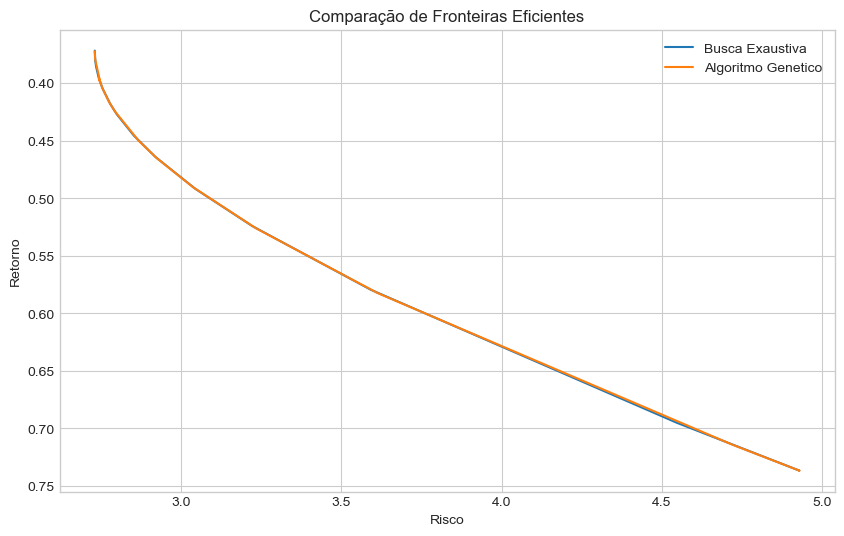

In [27]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')
colors = ['b', 'g']

plt.plot(100*pd.DataFrame(dic).T['s'], 100*pd.DataFrame(dic).T['r'], label='Busca Exaustiva')
plt.plot(100*pd.DataFrame(results).T['s'], 100*pd.DataFrame(results).T['r'], label='Algoritmo Genetico')

plt.title('Comparação de Fronteiras Eficientes')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.legend()
plt.gca().invert_yaxis()

plt.savefig("3ativos.jpg", dpi=300)

# 4 Ativos

In [4]:
cols = random.sample(list(data.columns), 4)
data_returns = data[cols]

In [5]:
num_assets = len(data_returns.columns)
expected_returns = data_returns.mean()
covariance_matrix = data_returns.cov()

population_size = 15
max_iterations = 10000
mutation_rate = 0.5
fitness_threshold = 1e-7


returns_percentile = 0
volatility_tolerance = 100

results = dict()

inicio = time.time()
for risk_aversion in range(0, 101, 5):
    risk_aversion = risk_aversion/100
    bi_series, returns, risk = optimize_normalized_genetic_algorithm_markowitz(population_size, num_assets, expected_returns, covariance_matrix, risk_aversion, max_iterations, mutation_rate, fitness_threshold, returns_percentile, volatility_tolerance)
#     results.append( [bi_series, returns, risk] )
    results[str(risk_aversion)] = {
        'bi_series': bi_series,
        'r': returns,
        's': risk
    }
fim = time.time()

print(f"{fim - inicio} segundos")

39.436235666275024 segundos


In [6]:
def initial_tuples(n, p_max, step, result=()):
    if n == 0:
        yield result
    else:
        for i in range(0, p_max + 1, step):
            yield from initial_tuples(n-1, p_max-i, step, result + (i,))
            
def generate_all_asset_combinations(n_ativos, step):
    result = list(initial_tuples(n_ativos - 1, 100, step))
    final_result = []
    for row in result:
        new_row = row + (100 - sum(row), )
        final_result.append(new_row)
    return final_result



In [7]:
inicio = time.time()
li = generate_all_asset_combinations(n_ativos=4, step=1)

# MAXIMO E MINIMO PARA NORMALIZACAO
max_r = [-np.inf, None]
min_s = [None, +np.inf]
    
for item in li:
    r = np.dot(data_returns, item).mean()
    s = np.dot(data_returns, item).std()
    max_r[0] = max_r[0] if r < max_r[0] else r
    max_r[1] = max_r[1] if r < max_r[0] else s
    
    min_s[1] = min_s[1] if s > min_s[1] else s
    min_s[0] = min_s[0] if s > min_s[1] else r
    

dic = dict()
for ra in range(0, 101, 5):
    ra = ra/100
    
    bf = +np.inf

    for item in li:
        item = np.array(item)/100
        r = np.dot(data_returns, item).mean()
        s = np.sqrt(np.linalg.multi_dot([item, data_returns.cov(), item]))
        
        # NORMALIZACAO
        rn = (r - min_s[0])/(max_r[0] - min_s[0])
        sn = (s - min_s[1])/(max_r[1] - min_s[1])
        f = ra * sn - (1-ra)*rn
        if f < bf:
            bf = f
            dic[ra] = {
                'r': r,
                's': s,
                'f': f
            }
            
fim = time.time()

print(f"{fim - inicio} segundos")

893.2922339439392 segundos


C:\Users\Hideki\AppData\Local\Temp\ipykernel_13156\4113632690.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


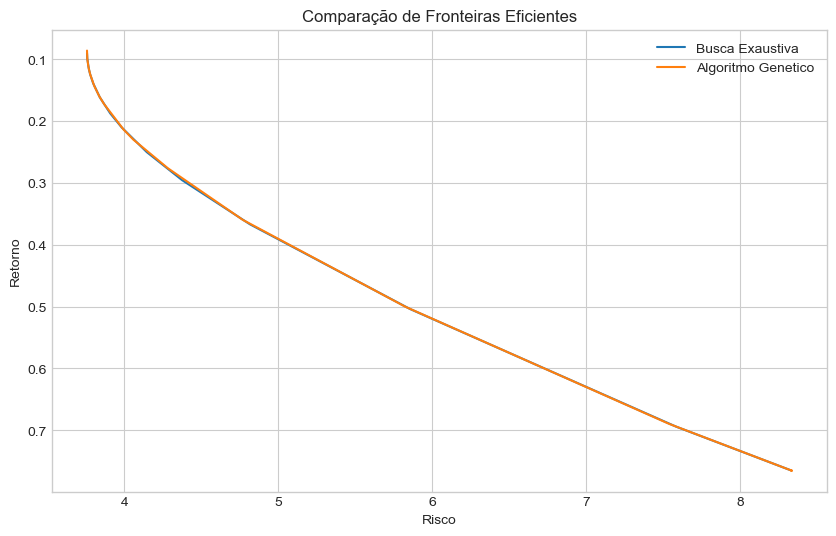

In [8]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')
colors = ['b', 'g']

plt.plot(100*pd.DataFrame(dic).T['s'], 100*pd.DataFrame(dic).T['r'], label='Busca Exaustiva')
plt.plot(100*pd.DataFrame(results).T['s'], 100*pd.DataFrame(results).T['r'], label='Algoritmo Genetico')

plt.title('Comparação de Fronteiras Eficientes')[]
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.legend()
plt.gca().invert_yaxis()

plt.savefig("4ativos.jpg", dpi=300)

# Reta de tempo de execução AG

In [10]:
tempo_execucao = dict()

for num_ativos in range(2, len(data.columns)):
    cols = random.sample(list(data.columns), num_ativos)
    data_returns = data[cols]

    num_assets = len(data_returns.columns)
    expected_returns = data_returns.mean()
    covariance_matrix = data_returns.cov()

    population_size = 15
    max_iterations = 10000
    mutation_rate = 0.5
    fitness_threshold = 1e-7


    returns_percentile = 0
    volatility_tolerance = 100

    results = dict()

    inicio = time.time()
    for risk_aversion in range(0, 101, 5):
        risk_aversion = risk_aversion/100
        bi_series, returns, risk = optimize_normalized_genetic_algorithm_markowitz(population_size, num_assets, expected_returns, covariance_matrix, risk_aversion, max_iterations, mutation_rate, fitness_threshold, returns_percentile, volatility_tolerance)
    #     results.append( [bi_series, returns, risk] )
        results[str(risk_aversion)] = {
            'bi_series': bi_series,
            'r': returns,
            's': risk
        }
    fim = time.time()

    print(f"{fim - inicio} segundos")
    tempo_execucao[str(num_ativos)] = fim - inicio

311.23789858818054 segundos
197.40989017486572 segundos
138.27549076080322 segundos
39.0948166847229 segundos
45.27085518836975 segundos
49.37294387817383 segundos
68.23372268676758 segundos
74.81679463386536 segundos
78.8802592754364 segundos
99.24069309234619 segundos
99.5521309375763 segundos
106.88172602653503 segundos
99.98584914207458 segundos
109.43311738967896 segundos
123.78674268722534 segundos
135.56938552856445 segundos
142.01431703567505 segundos
163.89547634124756 segundos
168.15250945091248 segundos
176.57335948944092 segundos
193.390953540802 segundos
211.62310075759888 segundos
212.40620112419128 segundos
200.68415069580078 segundos
211.67236232757568 segundos
220.38752722740173 segundos
216.0151755809784 segundos
220.55355787277222 segundos
249.20015692710876 segundos
243.83783864974976 segundos
246.91717743873596 segundos
246.00842237472534 segundos
267.3518452644348 segundos
266.0960168838501 segundos
275.8435957431793 segundos
289.94653606414795 segundos
287.600069

KeyboardInterrupt: 

,0
2,311.237899
3,197.409890
4,138.275491
5,39.094817
6,45.270855
...,...
139,1143.495813
140,1143.964860
141,1329.610587
142,1709.046772


In [26]:
pd.DataFrame([tempo_execucao]).T[0]

2       311.237899
3       197.409890
4       138.275491
5        39.094817
6        45.270855
          ...     
139    1143.495813
140    1143.964860
141    1329.610587
142    1709.046772
143    2636.148251
Name: 0, Length: 142, dtype: float64

In [32]:
full = tempo_execucao.copy()

In [38]:
tempo_execucao = {i: k for i,k in tempo_execucao.items() if float(i) <= 100}

C:\Users\Hideki\AppData\Local\Temp\ipykernel_13156\3143649008.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


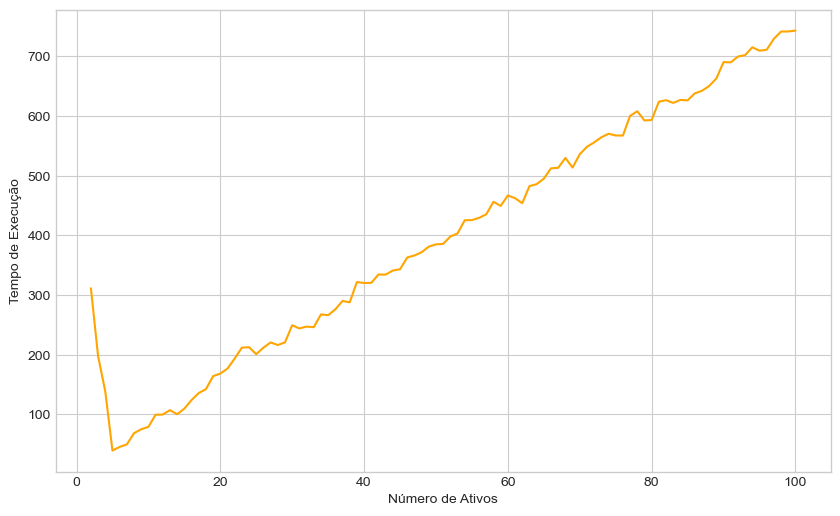

In [45]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')

plt.plot(pd.DataFrame([tempo_execucao]).T.index.astype(float), pd.DataFrame([tempo_execucao]).T[0], label='Tempo de Execução AG', color='orange')

plt.xlabel('Número de Ativos')
plt.ylabel('Tempo de Execução')

plt.savefig("tempo_execucao.jpg", dpi=300)